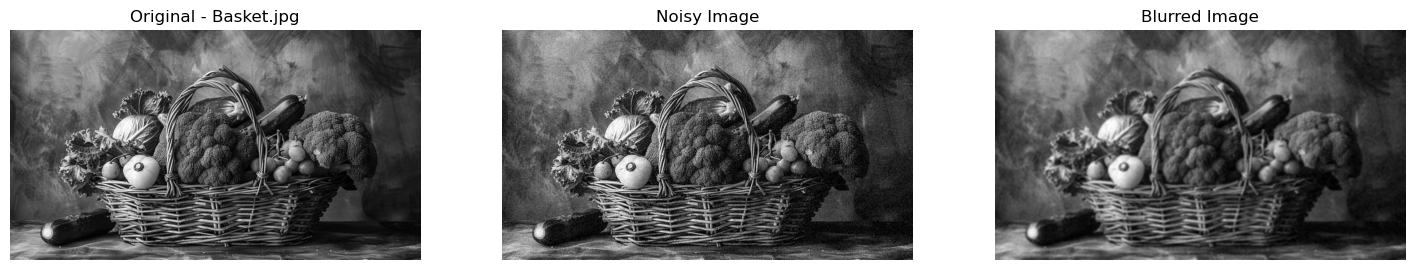

Metrics for Basket.jpg:
PSNR: 31.36
SSIM: 0.7719
MSE: 47.49



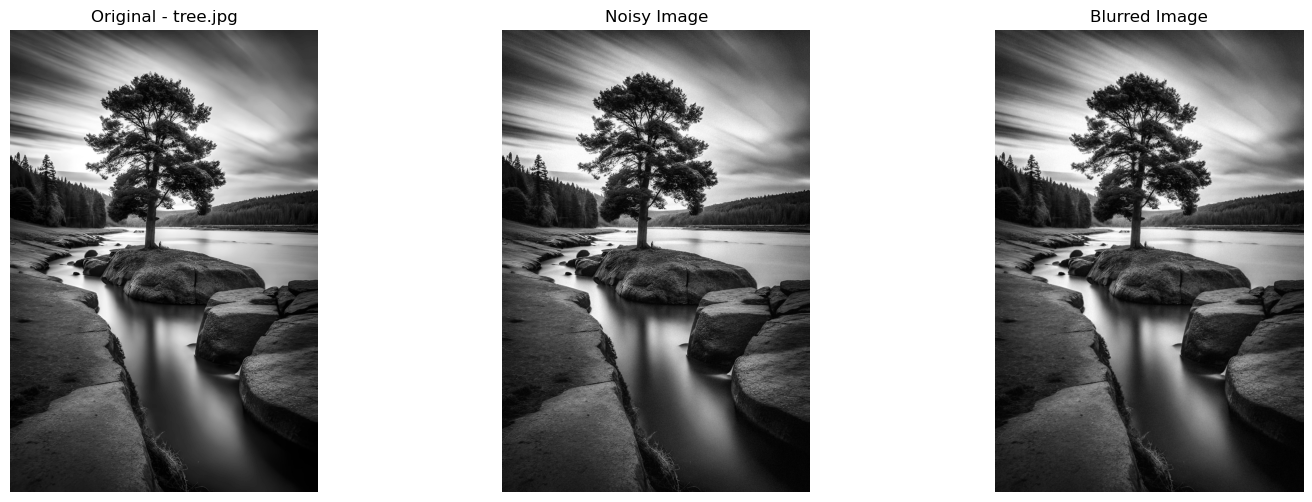

Metrics for tree.jpg:
PSNR: 33.97
SSIM: 0.8452
MSE: 26.06



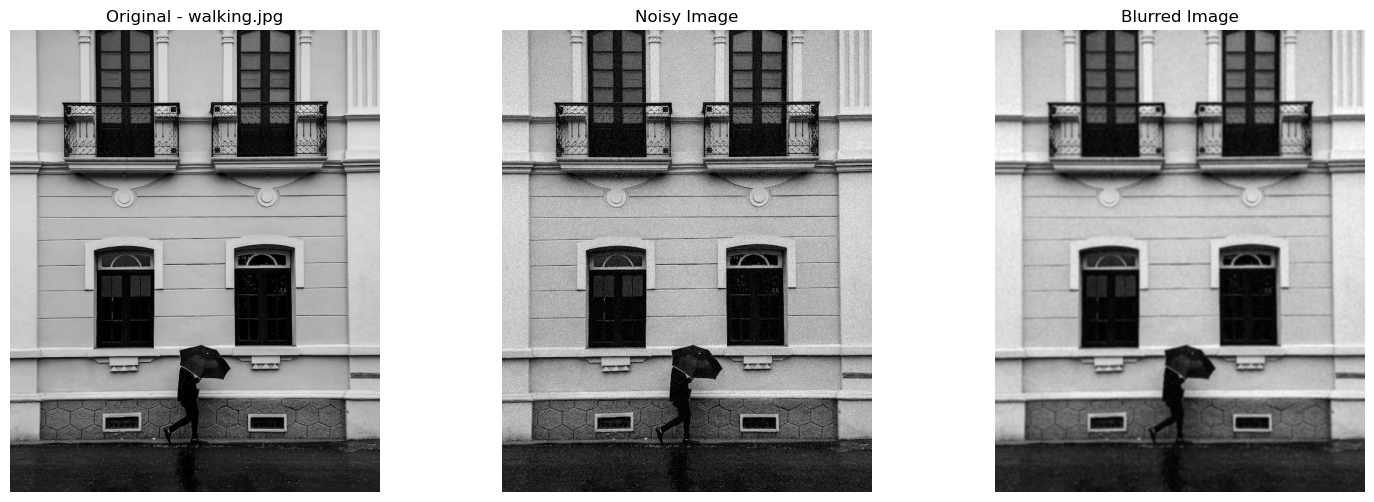

Metrics for walking.jpg:
PSNR: 32.18
SSIM: 0.7402
MSE: 39.33


--- Summary of Results ---
Image               PSNR      SSIM      MSE       
Basket.jpg          31.36     0.7719    47.49     
tree.jpg            33.97     0.8452    26.06     
walking.jpg         32.18     0.7402    39.33     


In [19]:
# Import necessary libraries
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
from math import log10

# Function to apply Gaussian Blur
def gaussian_blur(image, kernel_size, sigma):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

# Function to calculate PSNR
def calculate_psnr(original, processed):
    mse = np.mean((original - processed) ** 2)
    if mse == 0:  # Perfect match
        return float('inf')
    return 20 * log10(255.0 / np.sqrt(mse))

# Function to calculate SSIM
def calculate_ssim(original, processed):
    return ssim(original, processed, data_range=processed.max() - processed.min())

# Function to add even noise
def add_even_noise(image, noise_level):
    noise = np.random.uniform(-noise_level, noise_level, image.shape).astype(np.float32)
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    return noisy_image

# List of individual image paths
image_paths = [
    "Basket.jpg",  
    "tree.jpg",  
    "walking.jpg"   
]

# Parameters
kernel_size = 5  # Kernel size (must be odd)
sigma = 1.5      # Standard deviation for Gaussian kernel
noise_level = 20  # Noise level for even noise (adjustable)

# Initialize a results list to store metrics for summary
results_summary = []

# Loop through the list of images
for image_path in image_paths:
    # Load the image
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Add even noise to the image
    noisy_image = add_even_noise(original_image, noise_level)
    
    # Apply Gaussian Blur to the noisy image
    blurred_image = gaussian_blur(noisy_image, kernel_size, sigma)
    
    # Calculate metrics
    psnr_value = calculate_psnr(original_image, blurred_image)
    ssim_value = calculate_ssim(original_image, blurred_image)
    mse_value = np.mean((original_image - blurred_image) ** 2)
    
    # Save metrics for summary
    results_summary.append({
        "Image": image_path,
        "PSNR": psnr_value,
        "SSIM": ssim_value,
        "MSE": mse_value
    })
    
    # Display the images sequentially
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 3, 1)
    plt.title(f"Original - {image_path}")
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.title("Noisy Image")
    plt.imshow(noisy_image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.title("Blurred Image")
    plt.imshow(blurred_image, cmap='gray')
    plt.axis('off')
    
    plt.show()
    
    # Display the corresponding metrics
    print(f"Metrics for {image_path}:")
    print(f"PSNR: {psnr_value:.2f}")
    print(f"SSIM: {ssim_value:.4f}")
    print(f"MSE: {mse_value:.2f}\n")

# Display the summary of results
print("\n--- Summary of Results ---")
print(f"{'Image':<20}{'PSNR':<10}{'SSIM':<10}{'MSE':<10}")
for result in results_summary:
    print(f"{result['Image']:<20}{result['PSNR']:<10.2f}{result['SSIM']:<10.4f}{result['MSE']:<10.2f}")
